In [1]:
import sys, os
import numpy as np
import h5py
import time

sys.path.append('/user_data/mmhender/imStat/code/')
from utils import prf_utils, torch_utils, texture_utils, default_paths
from model_fitting import initialize_fitting

import matplotlib.pyplot as plt

In [2]:
subject = 1;
which_prf_grid = 5;

min_pct_var = 95
max_pc_to_retain = 100

models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)
n_prfs = len(models)

In [6]:
import pandas as pd

subject=1;
semantic_feature_set = 'coco_things_categ'
n_feat_each_prf = np.zeros((n_prfs,))
path_to_save = os.path.join(default_paths.stim_labels_root, \
                                         'S%d_within_prf_grid%d_PCA'%(subject, which_prf_grid))
for prf_model_index in range(n_prfs):
# for prf_model_index in range(2):

    fn2save = os.path.join(path_to_save, 'S%d_%s_prf%d_PCA.csv'%(subject, semantic_feature_set, prf_model_index))
    dat = np.array(pd.read_csv(fn2save, index_col=0))
    n_feat_each_prf[prf_model_index] = dat.shape[1]

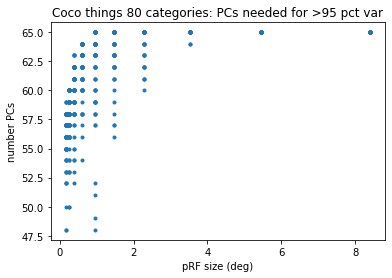

In [8]:
plt.figure();
plt.plot(models[:,2]*8.4, np.array(n_feat_each_prf),'.')
plt.xlabel('pRF size (deg)');
plt.ylabel('number PCs');
plt.title('Coco things 80 categories: PCs needed for >%d pct var'%min_pct_var);

In [9]:
import pandas as pd

subject=1;
semantic_feature_set = 'coco_stuff_categ'
n_feat_each_prf = np.zeros((n_prfs,))
path_to_save = os.path.join(default_paths.stim_labels_root, \
                                         'S%d_within_prf_grid%d_PCA'%(subject, which_prf_grid))
for prf_model_index in range(n_prfs):
# for prf_model_index in range(2):

    fn2save = os.path.join(path_to_save, 'S%d_%s_prf%d_PCA.csv'%(subject, semantic_feature_set, prf_model_index))
    dat = np.array(pd.read_csv(fn2save, index_col=0))
    n_feat_each_prf[prf_model_index] = dat.shape[1]

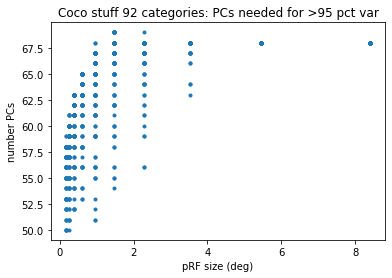

In [10]:
plt.figure();
plt.plot(models[:,2]*8.4, np.array(n_feat_each_prf),'.')
plt.xlabel('pRF size (deg)');
plt.ylabel('number PCs');
plt.title('Coco stuff 92 categories: PCs needed for >%d pct var'%min_pct_var);

In [23]:
# sketch tokens features

sketch_token_feat_path = default_paths.sketch_token_feat_path
features_file = os.path.join(sketch_token_feat_path, 'PCA', \
                                          'S%d_PCA_grid%d.npy'%(subject, which_prf_grid))   

In [24]:
# loading pca results, checking how many comp are needed to reach a given pct variance explained
print('loading from %s'%features_file)
pc_result = np.load(features_file, allow_pickle=True).item()
scores_each_prf = [pc_result['scores'][mm] for mm in range(n_prfs)]
ev_each_prf = [pc_result['ev'][mm] for mm in range(n_prfs)]
pc_result = None
n_pcs_avail = scores_each_prf[0].shape[1]
n_feat_each_prf = [np.where(np.cumsum(ev)>min_pct_var)[0][0] \
                   if np.size(np.where(np.cumsum(ev)>min_pct_var))>0 \
                   else n_pcs_avail for ev in ev_each_prf]
n_feat_each_prf = [np.min([nf, max_pc_to_retain]) for nf in n_feat_each_prf]
print([np.min(n_feat_each_prf), np.max(n_feat_each_prf)])

loading from /user_data/mmhender/features/sketch_tokens/PCA/S1_PCA_grid5.npy
[7, 65]


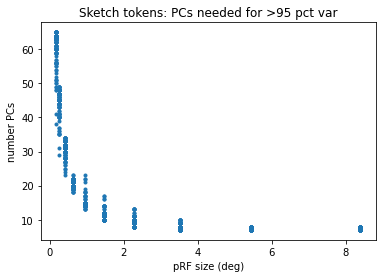

In [25]:
plt.figure();
plt.plot(models[:,2]*8.4, np.array(n_feat_each_prf),'.')
plt.xlabel('pRF size (deg)');
plt.ylabel('number PCs');
plt.title('Sketch tokens: PCs needed for >%d pct var'%min_pct_var);

In [26]:
# pyramid texture model features

pyramid_texture_feat_path = default_paths.pyramid_texture_feat_path
n_ori=4; n_sf = 4;
features_file_hl = os.path.join(pyramid_texture_feat_path, 'PCA', \
                     'S%d_%dori_%dsf_PCA_higher-level_only_grid%d.npy'%(subject,n_ori, \
                                                                n_sf,which_prf_grid))
features_file_ll = os.path.join(pyramid_texture_feat_path, 'PCA', \
                     'S%d_%dori_%dsf_PCA_lower-level_only_grid%d.npy'%(subject,n_ori, \
                                                                n_sf,which_prf_grid))

In [27]:
# loading pca results, checking how many comp are needed to reach a given pct variance explained
print('loading from %s'%features_file_hl)
pc_result = np.load(features_file_hl, allow_pickle=True).item()
scores_each_prf = [pc_result['scores'][mm] for mm in range(n_prfs)]
ev_each_prf = [pc_result['ev'][mm] for mm in range(n_prfs)]
pc_result = None
n_pcs_avail = scores_each_prf[0].shape[1]
n_feat_each_prf = [np.where(np.cumsum(ev)>min_pct_var)[0][0] \
                   if np.size(np.where(np.cumsum(ev)>min_pct_var))>0 \
                   else n_pcs_avail for ev in ev_each_prf]
n_feat_each_prf = [np.min([nf, max_pc_to_retain]) for nf in n_feat_each_prf]
print([np.min(n_feat_each_prf), np.max(n_feat_each_prf)])

loading from /user_data/mmhender/features/pyramid_texture/PCA/S1_4ori_4sf_PCA_higher-level_only_grid5.npy
[17, 53]


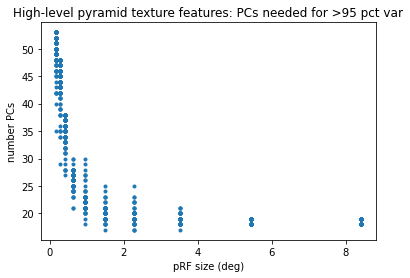

In [28]:
plt.figure();
plt.plot(models[:,2]*8.4, np.array(n_feat_each_prf),'.')
plt.xlabel('pRF size (deg)');
plt.ylabel('number PCs');
plt.title('High-level pyramid texture features: PCs needed for >%d pct var'%min_pct_var);

In [29]:
# loading pca results, checking how many comp are needed to reach a given pct variance explained
print('loading from %s'%features_file_ll)
pc_result = np.load(features_file_ll, allow_pickle=True).item()
scores_each_prf = [pc_result['scores'][mm] for mm in range(n_prfs)]
ev_each_prf = [pc_result['ev'][mm] for mm in range(n_prfs)]
pc_result = None
n_pcs_avail = scores_each_prf[0].shape[1]
n_feat_each_prf = [np.where(np.cumsum(ev)>min_pct_var)[0][0] \
                   if np.size(np.where(np.cumsum(ev)>min_pct_var))>0 \
                   else n_pcs_avail for ev in ev_each_prf]
n_feat_each_prf = [np.min([nf, max_pc_to_retain]) for nf in n_feat_each_prf]
print([np.min(n_feat_each_prf), np.max(n_feat_each_prf)])

loading from /user_data/mmhender/features/pyramid_texture/PCA/S1_4ori_4sf_PCA_lower-level_only_grid5.npy
[8, 16]


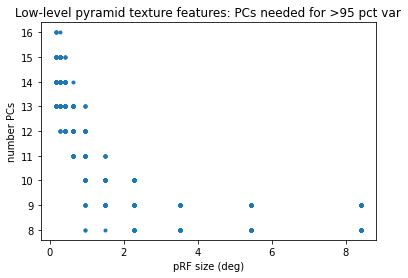

In [30]:
plt.figure();
plt.plot(models[:,2]*8.4, np.array(n_feat_each_prf),'.')
plt.xlabel('pRF size (deg)');
plt.ylabel('number PCs');
plt.title('Low-level pyramid texture features: PCs needed for >%d pct var'%min_pct_var);

In [3]:
# alexnet
from feature_extraction import extract_alexnet_features
alexnet_layer_names  = extract_alexnet_features.alexnet_layer_names
n_features_each_layer = extract_alexnet_features.n_features_each_layer
alexnet_feat_path = default_paths.alexnet_feat_path
padding_str='reflect_'
features_files = [[] for ll in range(5)]
for ll in range(5):
    layer_name = 'Conv%d_ReLU'%(ll+1)
    features_files[ll] = os.path.join(alexnet_feat_path, 'PCA', \
              'S%d_%s_%sPCA_grid%d.npy'%(subject, layer_name, padding_str, which_prf_grid))

In [7]:
# loading pca results, checking how many comp are needed to reach a given pct variance explained
n_feat = [[] for ll in range(5)]
for ll in range(5):
    
    print('loading from %s'%features_files[ll])
    pc_result = np.load(features_files[ll], allow_pickle=True).item()
    n_pcs_avail = pc_result['scores'][0].shape[1]
    ev_each_prf = [pc_result['ev'][mm] for mm in range(n_prfs)]
    pc_result = None
    
    n_feat_each_prf = [np.where(np.cumsum(ev)>min_pct_var)[0][0] \
                       if np.size(np.where(np.cumsum(ev)>min_pct_var))>0 \
                       else n_pcs_avail for ev in ev_each_prf]
    n_feat_each_prf = [np.min([nf, max_pc_to_retain]) for nf in n_feat_each_prf]
    print([np.min(n_feat_each_prf), np.max(n_feat_each_prf)])
    n_feat[ll] = n_feat_each_prf

loading from /user_data/mmhender/features/alexnet/PCA/S1_Conv1_ReLU_reflect_PCA_grid5.npy
[5, 18]
loading from /user_data/mmhender/features/alexnet/PCA/S1_Conv2_ReLU_reflect_PCA_grid5.npy
[23, 72]
loading from /user_data/mmhender/features/alexnet/PCA/S1_Conv3_ReLU_reflect_PCA_grid5.npy
[54, 84]
loading from /user_data/mmhender/features/alexnet/PCA/S1_Conv4_ReLU_reflect_PCA_grid5.npy
[54, 82]
loading from /user_data/mmhender/features/alexnet/PCA/S1_Conv5_ReLU_reflect_PCA_grid5.npy
[56, 79]


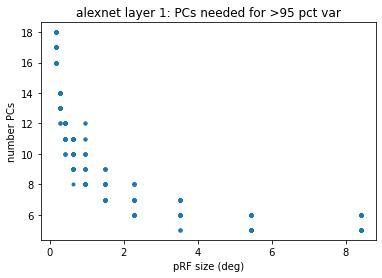

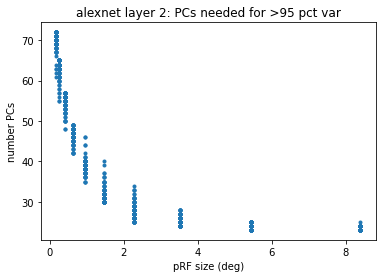

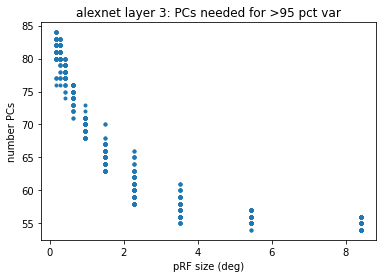

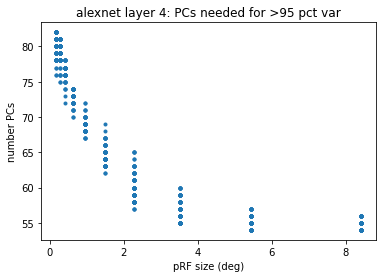

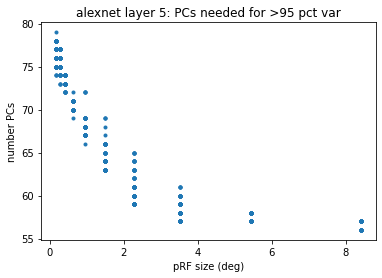

In [9]:
for ll in range(5):
    plt.figure();
    plt.plot(models[:,2]*8.4, np.array(n_feat[ll]),'.')
    plt.xlabel('pRF size (deg)');
    plt.ylabel('number PCs');
    plt.title('alexnet layer %d: PCs needed for >%d pct var'%((ll+1),min_pct_var));

In [16]:
# clip
clip_feat_path = default_paths.clip_feat_path
from feature_extraction import extract_clip_features
clip_layer_names  = extract_clip_features.resnet_block_names
n_features_each_layer = extract_clip_features.n_features_each_resnet_block

model_architecture='RN50'
features_files = [[] for ll in range(16)]
for ll in range(16):
    layer_name = 'block%d'%(ll)
    features_files[ll] = features_file = os.path.join(clip_feat_path, 'PCA', \
              'S%d_%s_%s_PCA_grid%d.h5py'%(subject, model_architecture, \
                                         layer_name, which_prf_grid)) 

In [34]:
# loading pca results, checking how many comp are needed to reach a given pct variance explained
prf_batch_size=100
n_prf_batches = int(np.ceil(n_prfs/prf_batch_size))          
prf_batch_inds = [np.arange(prf_batch_size*bb, np.min([prf_batch_size*(bb+1), n_prfs])) \
                       for bb in range(n_prf_batches)]

n_feat = [[] for ll in range(16)]
for ll in range(16):
    
    t = time.time()
    print('loading from %s'%features_files[ll])
    n_feat_each_prf = np.zeros((n_prfs,),dtype=int)
    for prf_batch_ind, batch_inds in enumerate(prf_batch_inds):
        # Loading raw features.
        with h5py.File(features_files[ll], 'r') as data_set:
            values = np.copy(data_set['/features'][0:1,:,batch_inds])
            data_set.close() 

        nan_inds = [np.where(np.isnan(values[0,:,mm])) \
                    for mm in range(len(batch_inds))]
        nan_inds = [ni[0][0] if len(ni)>0 else max_pc_to_retain for ni in nan_inds]
        assert(not np.any(nan_inds==max_pc_to_retain))
        n_feat_each_prf[batch_inds] = nan_inds

    elapsed = time.time() - t
    print('Took %.5f seconds to load file'%elapsed)
    
    print([np.min(n_feat_each_prf), np.max(n_feat_each_prf)])
    n_feat[ll] = n_feat_each_prf

loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block0_PCA_grid5.h5py
Took 0.02751 seconds to load file
[7, 25]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block1_PCA_grid5.h5py
Took 0.02397 seconds to load file
[10, 39]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block2_PCA_grid5.h5py
Took 0.02387 seconds to load file
[14, 55]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block3_PCA_grid5.h5py
Took 0.02466 seconds to load file
[19, 62]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block4_PCA_grid5.h5py
Took 0.02436 seconds to load file
[28, 72]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block5_PCA_grid5.h5py
Took 0.02478 seconds to load file
[32, 77]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block6_PCA_grid5.h5py
Took 0.02490 seconds to load file
[39, 81]
loading from /user_data/mmhender/features/CLIP/PCA/S1_RN50_block7_PCA_grid5.h5py
Took 0.02414 seconds to load file
[41, 80]
loading f

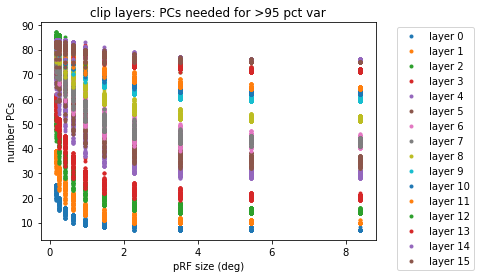

In [31]:

plt.figure();
for ll in range(16):
    
    plt.plot(models[:,2]*8.4, np.array(n_feat[ll]),'.')

plt.xlabel('pRF size (deg)');
plt.ylabel('number PCs');
plt.title('clip layers: PCs needed for >%d pct var'%(min_pct_var));
plt.legend(['layer %d'%ll for ll in range(16)],bbox_to_anchor=(1.05, 1.0));